In [29]:

import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

## 데이터 읽어오기.
df = pd.read_csv("./house_price_of_unit_area.csv")

print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   house age                            414 non-null    float64
 1   distance to the nearest MRT station  414 non-null    float64
 2   number of convenience stores         414 non-null    int64  
 3   latitude                             414 non-null    float64
 4   longitude                            414 non-null    float64
 5   house price of unit area             414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB
None
   house age  ...  house price of unit area
0       32.0  ...                      37.9
1       19.5  ...                      42.2
2       13.3  ...                      47.3
3       13.3  ...                      54.8
4        5.0  ...                      43.1

[5 rows x 6 columns]


In [41]:


## key말고 해당하는 value값만 추출해서 입력과 정갑 데이터 분류
x_data = df.copy()
tf.random.set_seed(777) #random seed를 고정해줘서 돌릴때마다 랜덤값을 고정
y_data = x_data.pop("house price of unit area")


In [ ]:
print(y_data)

In [43]:
print(x_data)

     house age  distance to the nearest MRT station  ...  latitude  longitude
0         32.0                             84.87882  ...  24.98298  121.54024
1         19.5                            306.59470  ...  24.98034  121.53951
2         13.3                            561.98450  ...  24.98746  121.54391
3         13.3                            561.98450  ...  24.98746  121.54391
4          5.0                            390.56840  ...  24.97937  121.54245
..         ...                                  ...  ...       ...        ...
409       13.7                           4082.01500  ...  24.94155  121.50381
410        5.6                             90.45606  ...  24.97433  121.54310
411       18.8                            390.96960  ...  24.97923  121.53986
412        8.1                            104.81010  ...  24.96674  121.54067
413        6.5                             90.45606  ...  24.97433  121.54310

[414 rows x 5 columns]


In [53]:

# 모델의 설정
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, input_dim=5, activation='sigmoid'))
model.add(tf.keras.layers.Dense(128, activation='sigmoid'))
model.add(tf.keras.layers.Dense(256, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1))
model.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 64)                384       
_________________________________________________________________
dense_52 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_53 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 257       
Total params: 41,985
Trainable params: 41,985
Non-trainable params: 0
_________________________________________________________________


In [54]:

optimizer=tf.keras.optimizers.SGD(learning_rate=0.04) ### 경사 하강법으로 global min 에 찾아가는 최적화 방법 선언.
loss=tf.keras.losses.mean_squared_error  ## 예측값 과 정답의 오차값 정의.
metrics=tf.keras.metrics.RootMeanSquaredError() ### 학습하면서 평가할 메트릭스 선언언

model.compile(loss =loss, optimizer= optimizer, metrics=[metrics])

## 모델 동작
result= model.fit(x_data, y_data, epochs= 100, batch_size=100)

Epoch 1/100
5/5 [==============================] - 0s 4ms/step - loss: 9746.7275 - root_mean_squared_error: 98.7255
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 1347.0885 - root_mean_squared_error: 36.7027
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 669.5294 - root_mean_squared_error: 25.8753
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 386.1737 - root_mean_squared_error: 19.6513
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 272.1414 - root_mean_squared_error: 16.4967
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 221.9879 - root_mean_squared_error: 14.8993
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 202.8628 - root_mean_squared_error: 14.2430
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 193.1803 - root_mean_squared_error: 13.8989
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 187.717

In [48]:
print(result.history.keys())

dict_keys(['loss', 'root_mean_squared_error'])


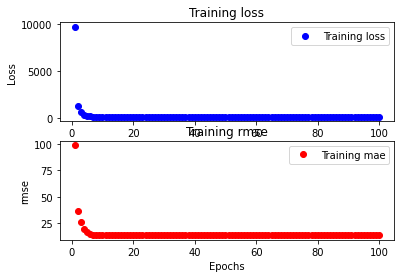

In [57]:
loss = result.history['loss']

# loss 그래프
epochs = range(1, len(loss)+1)
plt.subplot(211)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

mae = result.history['root_mean_squared_error']
epochs = range(1, len(mae)+1)

# mean absolute error 그래프화
plt.subplot(212)
plt.plot(epochs, mae, 'ro', label='Training mae')
plt.title('Training rmse')
plt.xlabel('Epochs')
plt.ylabel('rmse')
plt.legend()

In [56]:
# x_data -> model -> predict값 - y_data값을 추출

print(model.evaluate(x_data, y_data))
print("\n Test rmse : %.4f" % (model.evaluate(x_data, y_data)[1]))

13/13 [==============================] - 0s 2ms/step - loss: 184.7025 - root_mean_squared_error: 13.5905
[184.70254516601562, 13.590531349182129]
13/13 [==============================] - 0s 1ms/step - loss: 184.7025 - root_mean_squared_error: 13.5905

 Test rmse : 13.5905
